Masume Shariftabar - 9927613

load dataset

In [ ]:
import os

#define the folder name
folder_name = "Data"

#check if the folder already exists, and create it if not
if not os.path.exists(folder_name):
  os.makedirs(folder_name)

%cd Data

!pip install --upgrade --no-cache-dir gdown
!gdown 1vl0LDTXqy28Jhy22A70e_KjqhFdoA3xA

/content/Data
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From: https://drive.google.com/uc?id=1vl0LDTXqy28Jhy22A70e_KjqhFdoA3xA
To: /content/Data/data.csv
100% 527k/527k [00:00<00:00, 37.7MB/s]


4.1

Read CSV and file Info

In [ ]:
import pandas as pd
import numpy as np

#upload dataset as dataframe
df = pd.read_csv('/content/Data/data.csv')

# to print the full summary
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

Count NAN data

In [ ]:
# Count NaN values in each column
df.isnull().sum()


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

Encode datas as number

In [ ]:
import pandas as pd

#upload dataset as dataframe
df = pd.read_csv('/content/Data/data.csv')

#iterate over each column in the dataframe
for col in df.columns:
  #check if column has non-numeric data
  if df[col].dtype == 'object':
    #encode values as integer
    df[col] = pd.factorize(df[col])[0]

#save new dataframe
df.to_csv('/content/Data/data2.csv', index=False)

Correlation Matrix

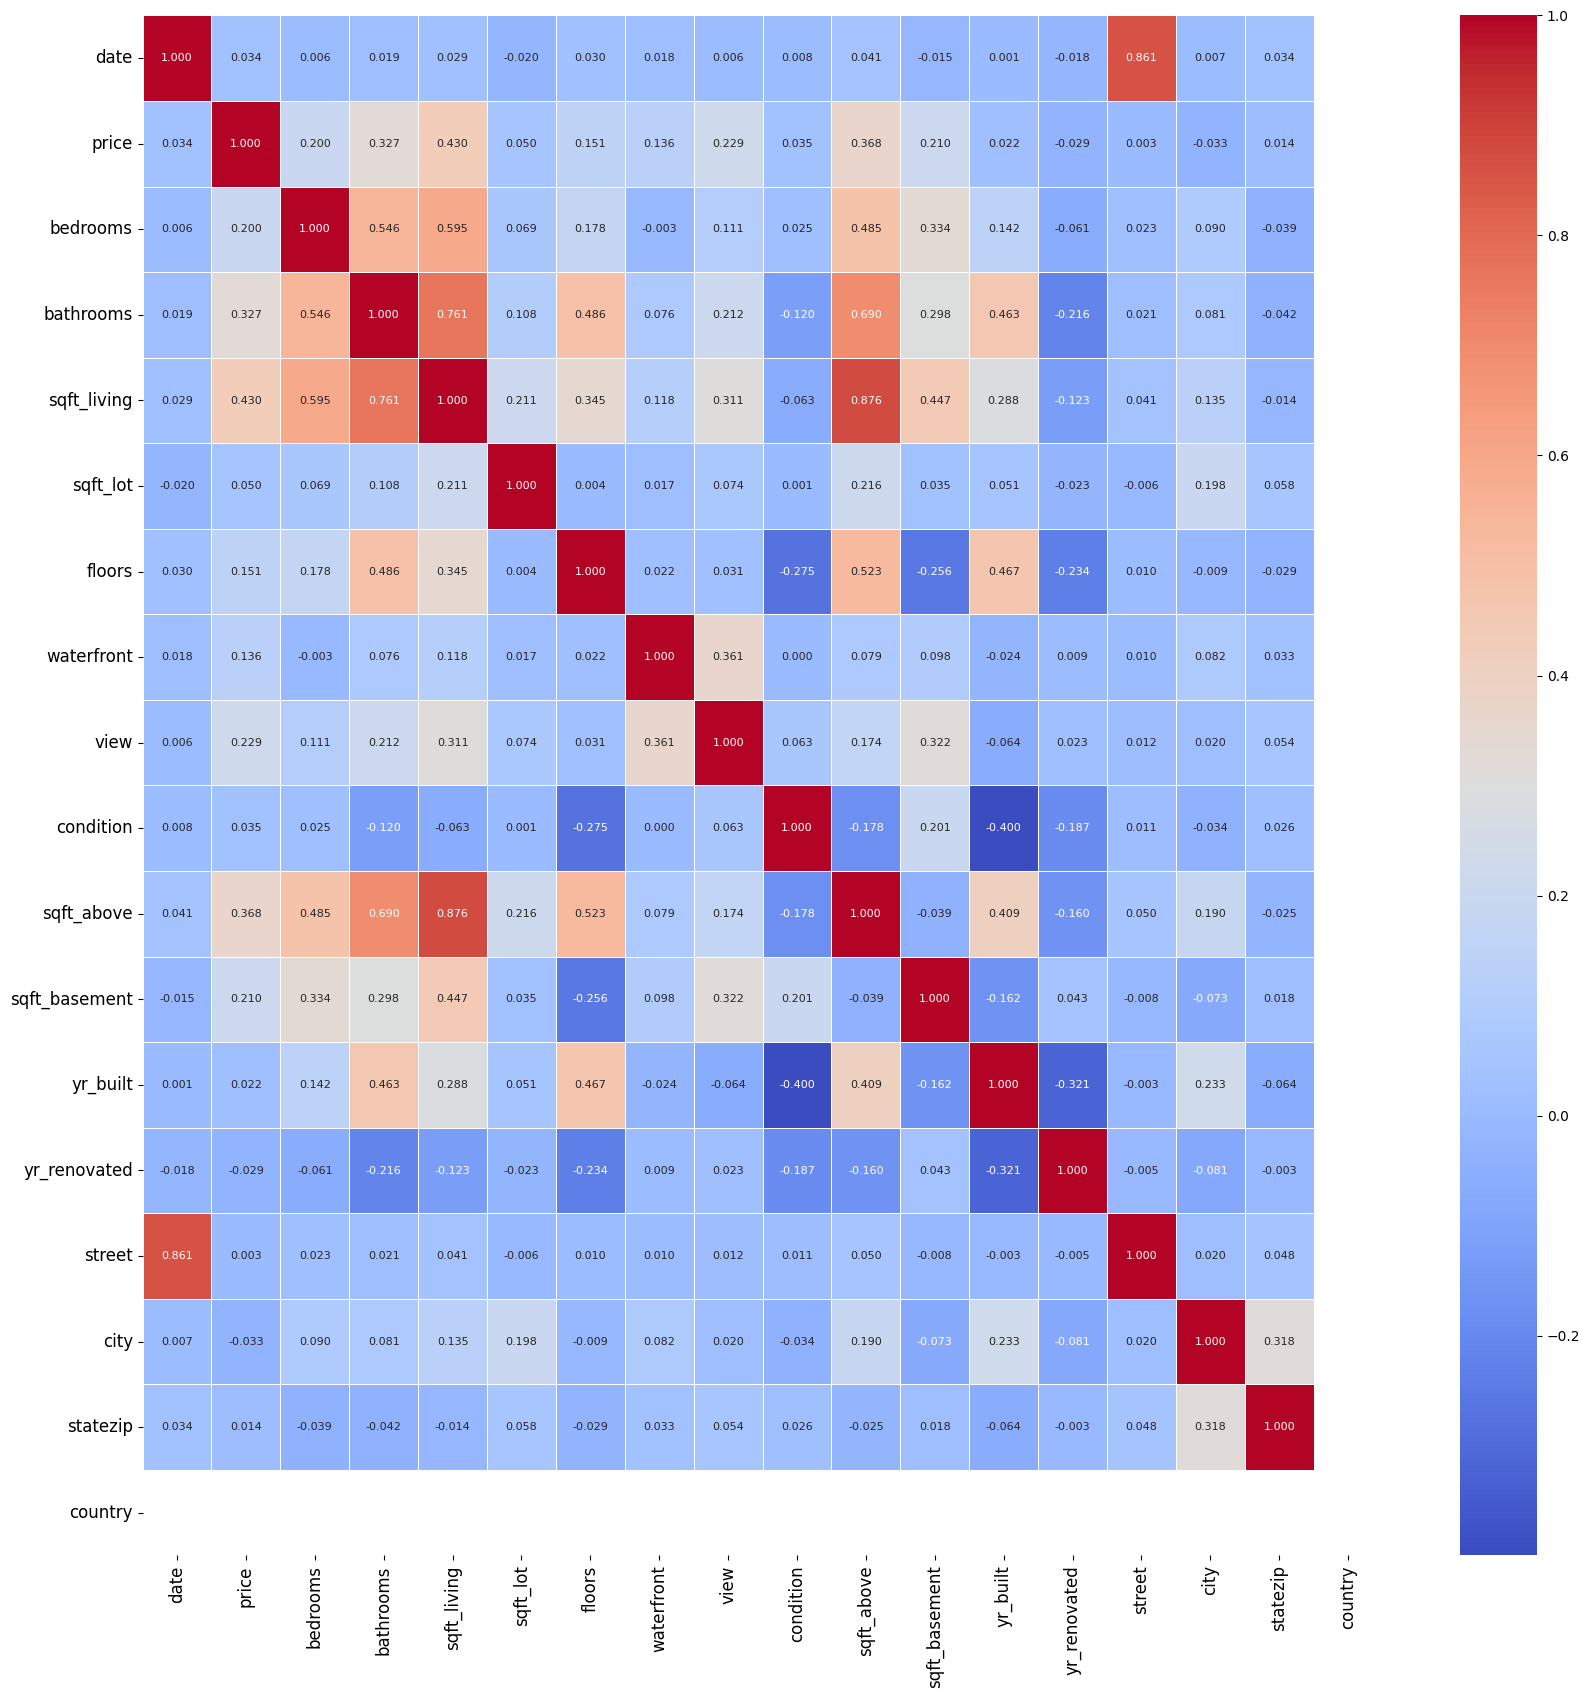

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read CSV file into DataFrame
df = pd.read_csv('/content/Data/data2.csv')

# Calculate correlation matrix
corr_matrix = df.corr()

# Create heatmap using seaborn
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8}, fmt='.3f', yticklabels=corr_matrix.columns)

# Adjust font size of annotations
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust margins of PDF file
plt.savefig('PIcS1.pdf', bbox_inches='tight')

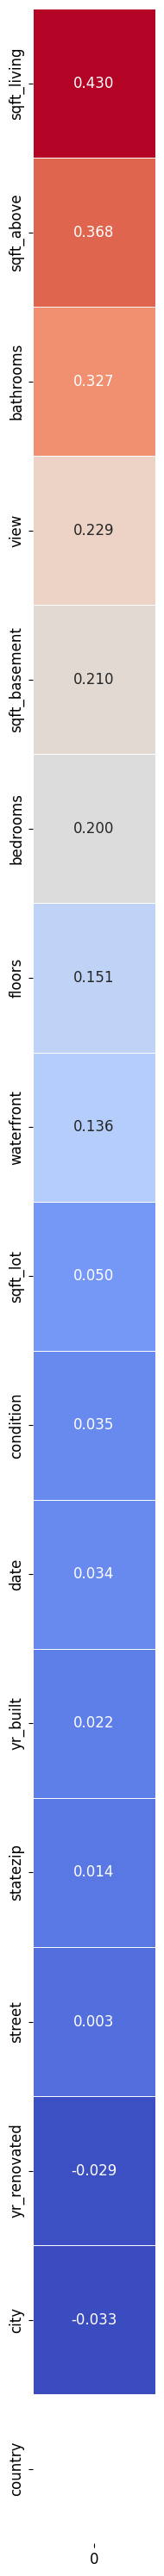

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read CSV file into DataFrame
df = pd.read_csv('/content/Data/data2.csv')

# Select columns to include in correlation matrix
cols = df.columns.tolist()
cols.remove('price')

# Calculate correlation matrix
corr_matrix = df[cols].corrwith(df['price']).sort_values(ascending=False)

# Create heatmap using seaborn
plt.figure(figsize=(2,30))
sns.heatmap(corr_matrix.to_frame(), annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 12}, fmt='.3f', cbar=False)

# Rotate x-axis tick labels to be horizontal
plt.xticks(rotation=0)

# Adjust font size of annotations
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust margins of PDF file
plt.tight_layout()
plt.savefig('priceCM1.pdf', bbox_inches='tight')

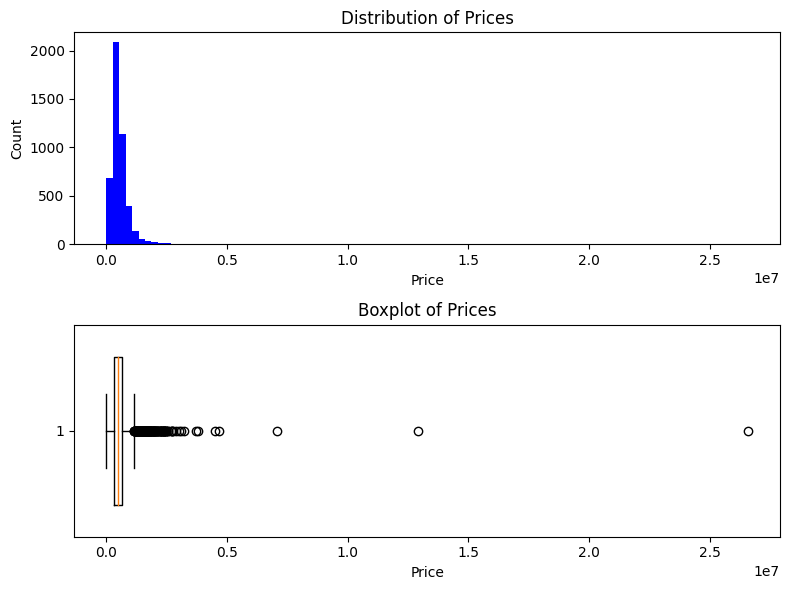

(0, 8000]             1
(8000, 16000]         0
(16000, 24000]        0
(24000, 32000]        0
(32000, 40000]        0
                     ..
(1152000, 1160000]    3
(1160000, 1168000]    1
(1168000, 1176000]    3
(1176000, 1184000]    3
(1184000, 1192000]    3
Name: price, Length: 149, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas dataframe
df = pd.read_csv('/content/Data/data2.csv')

# Plot the distribution of the 'price' column as a histogram
plt.figure(figsize=(8, 6))  # Set the size of the figure
plt.subplot(2, 1, 1)  # Create the first subplot
plt.hist(df['price'], bins=100, color='blue')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Prices')

# Plot a boxplot of the 'price' column
plt.subplot(2, 1, 2)  # Create the second subplot
plt.boxplot(df['price'], vert=False, widths=0.7)
plt.xlabel('Price')
plt.title('Boxplot of Prices')

plt.tight_layout()  # Automatically adjust subplot parameters

# Save the plot as a PDF file with a fit margin
plt.savefig('dist1.pdf', bbox_inches='tight')
plt.show()

# Define the bins for the price ranges
price_ranges = pd.cut(df['price'], bins=range(0, 1200000, 8000))
# Calculate the count of prices in each range
price_counts = price_ranges.value_counts().sort_index()
# Display the price range counts
print(price_counts)


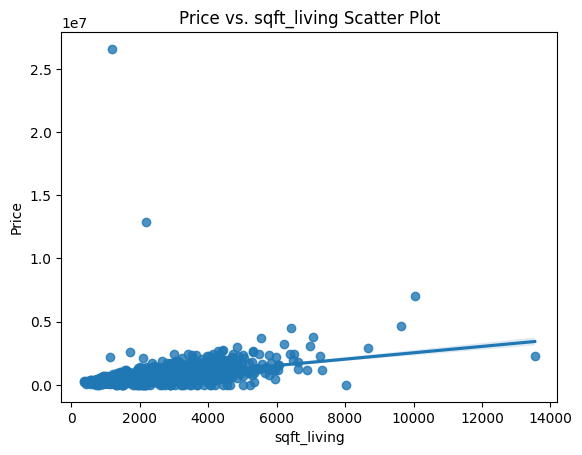

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a pandas dataframe
df = pd.read_csv('/content/Data/data2.csv')

# Create a scatter plot of 'price' versus 'sqft_living'
sns.regplot(x=df['sqft_living'], y=df['price'])
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.title('Price vs. sqft_living Scatter Plot')

# Save the plot as a PDF file with a fit margin
plt.savefig('pricevssqft_living.pdf', bbox_inches='tight')

plt.show()

4.4

In [ ]:
import pandas as pd
import difflib

# list of valid month and year names
valid_names = ['04', '05', '06', '07', '2014']

# read the original csv file into a pandas dataframe
df = pd.read_csv('/content/Data/data2.csv')

# extract the first word of each date into a new year column
df['year'] = df['date'].str.split().str[0]

# replace any invalid names with the nearest match from the list
df['year'] = df['date'].apply(lambda x: difflib.get_close_matches(x, valid_names, n=1)[0])

# extract the second word of each date into a new month column
df['month'] = df['date'].str.split().str[1]

# replace any invalid names with the nearest match from the list
df['month'] = df['date'].apply(lambda x: difflib.get_close_matches(x, valid_names, n=1)[0])

cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

# drop the date column
df = df.drop(['date'], axis=1)

# save the modified dataframe to a new csv file
df.to_csv('C/content/Data/data3.csv', index=False)


IndexError: ignored

Train Test(80/20)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read data from CSV file into a Pandas dataframe
data = pd.read_csv('/content/Data/data2.csv')

# Split the data into train and test sets
train_data, test_data, train_label, test_label = train_test_split(data.drop(['price'], axis=1), data['price'], test_size=0.2, random_state=13)

# Save train and test data to new CSV files
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

# Save train and test labels to new CSV files
train_label.to_csv('train_label.csv', index=False)
test_label.to_csv('test_label.csv', index=False)

# Print shape of each set
print(f"train_data shape: {train_data.shape}")
print(f"test_data shape: {test_data.shape}")
print(f"train_label shape: {train_label.shape}")
print(f"test_label shape: {test_label.shape}")

train_data shape: (3680, 17)
test_data shape: (920, 17)
train_label shape: (3680,)
test_label shape: (920,)


MimMaxScaler

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# read csv file into a pandas dataframe
data = pd.read_csv('/content/Data/data2.csv')

# extract label column as y
y = data['price']

# extract all other columns as X
X = data.drop(columns=['price'])

# split data into train and test sets with a 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# scale the training data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# scale the test data using the same scaler used for training data
X_test_scaled = scaler.transform(X_test)

# save train and test data/label in new files
pd.DataFrame(X_train_scaled).to_csv('Xtrain.csv', index=False)
y_train.to_csv('ytrain.csv', index=False)
pd.DataFrame(X_test_scaled).to_csv('Xtest.csv', index=False)
y_test.to_csv('ytest.csv', index=False)

MLP

In [ ]:
import torch
import torch.nn as nn

# Define the MLP models
class MLP2(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super(MLP2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

Add Validation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Read the CSV file
data = pd.read_csv('/content/Data/data2.csv')

# Separate the label and data
label = df['price']
data = df.drop('price', axis=1)

# Remove the header from the variables
data = data.values
label = label.values

# Split the data into train/validation/test sets
train_data, test_data, train_label, test_label = train_test_split(data, label, test_size=0.2, random_state=13)
train_data, val_data, train_label, val_label = train_test_split(train_data, train_label, test_size=0.2, random_state=13)

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
val_data = scaler.transform(val_data)
test_data = scaler.transform(test_data)

# Print shape of each set
print(f"train_data shape: {train_data.shape}")
print(f"val_data shape: {val_data.shape}")
print(f"test_data shape: {test_data.shape}")
print(f"train_label shape: {train_label.shape}")
print(f"val_label shape: {val_label.shape}")
print(f"test_label shape: {test_label.shape}")

# Save the train/validation/test data/label to new files
pd.DataFrame(train_data).to_csv('/content/finaltrain_data.csv', index=False, header=False)
pd.DataFrame(val_data).to_csv('/content/finalval_data.csv', index=False, header=False)
pd.DataFrame(test_data).to_csv('/content/finaltest_data.csv', index=False, header=False)
pd.DataFrame(train_label).to_csv('/content/finaltrain_label.csv', index=False, header=False)
pd.DataFrame(val_label).to_csv('/content/finalval_label.csv', index=False, header=False)
pd.DataFrame(test_label).to_csv('/content/finaltest_label.csv', index=False, header=False)

train_data shape: (2944, 18)
val_data shape: (736, 18)
test_data shape: (920, 18)
train_label shape: (2944,)
val_label shape: (736,)
test_label shape: (920,)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt



# Define the training function
def train(model, optimizer, criterion, train_data, train_label, val_data, val_label, num_epochs=1000):
    train_loss_list = []
    val_loss_list = []
    r2score_list = []
    train_r2score_list = []
    best_model = None
    best_r2score = -1

    for epoch in range(num_epochs):
        # Training
        model.train()
        optimizer.zero_grad()
        train_output = model(train_data)
        train_loss = criterion(train_output.squeeze(), train_label)
        train_loss.backward()
        optimizer.step()
        train_loss_list.append(train_loss.item())
        train_r2score = r2_score(train_label, train_output.squeeze().detach().numpy())
        train_r2score_list.append(train_r2score)

        # Validation
        model.eval()
        with torch.no_grad():
            val_output = model(val_data)
            val_loss = criterion(val_output.squeeze(), val_label)
            val_loss_list.append(val_loss.item())
            r2score = r2_score(val_label, val_output.squeeze().detach().numpy())
            r2score_list.append(r2score)
            if r2score > best_r2score:
                best_r2score = r2score
                best_model = model.state_dict()

        # Print loss and R2 score every 100 epochs
        if (epoch+1) % 5 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Train R2 score: {train_r2score:.4f}, Val R2 score: {r2score:.4f}")

    # Plot loss curve and save as pdf
    plt.plot(train_loss_list, label='Train Loss')
    plt.plot(val_loss_list, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(type(model).__name__)
    plt.savefig(f"{type(model).__name__}_loss.pdf")
    plt.show()

    # Plot R2 score curve and save as pdf
    plt.plot(train_r2score_list, label='Train R2 score')
    plt.plot(r2score_list, label='Val R2 score')
    plt.xlabel('Epoch')
    plt.ylabel('R2 score')
    plt.legend()
    plt.title(type(model).__name__)
    plt.savefig(f"{type(model).__name__}_r2score.pdf")
    plt.show()

    # Return the best model based on the validation R2 score
    return best_model

# Define the data and labels
train_data = torch.Tensor(train_data)
train_label = torch.Tensor(train_label)
val_data = torch.Tensor(val_data)
val_label = torch.Tensor(val_label)
test_data = torch.Tensor(test_data)
test_label = torch.Tensor(test_label)

# Define the hyperparameters
input_dim = 23
output_dim = 1
hidden_dim1 = 16
hidden_dim2 = 64
hidden_dim3 = 128
learning_rate = 0.001
num_epochs = 120

# Train the model
model2 = MLP2(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer2 = optim.Adam(model2.parameters(), lr=learning_rate)
criterion2 = nn.MSELoss()
best_model2 = train(model2, optimizer2, criterion2, train_data, train_label, val_data, val_label, num_epochs=num_epochs)

# Evaluate the model on the test set
model2.load_state_dict(best_model2)
model2.eval()
with torch.no_grad():
    test_output2 = model2(test_data)
    test_loss2 = criterion2(test_output2.squeeze(), test_label)
    test_r2score2 = r2_score(test_label, test_output2.squeeze().detach().numpy())

# Print the test set results
print("MLP2 Test Set Results:")
print(f"Loss: {test_loss2:.4f}, R2 Score: {test_r2score2:.4f}")


RuntimeError: ignored

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Define the MLP models
class MLP2(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super(MLP2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define the training function
def train(model, optimizer, criterion, train_data, train_label, val_data, val_label, num_epochs=1000):
    train_loss_list = []
    val_loss_list = []
    r2score_list = []
    train_r2score_list = []
    best_model = None
    best_r2score = -1

    for epoch in range(num_epochs):
        # Training
        model.train()
        optimizer.zero_grad()
        train_output = model(train_data)
        train_loss = criterion(train_output.squeeze(), train_label)
        train_loss.backward()
        optimizer.step()
        train_loss_list.append(train_loss.item())
        train_r2score = r2_score(train_label, train_output.squeeze().detach().numpy())
        train_r2score_list.append(train_r2score)

        # Validation
        model.eval()
        with torch.no_grad():
            val_output = model(val_data)
            val_loss = criterion(val_output.squeeze(), val_label)
            val_loss_list.append(val_loss.item())
            r2score = r2_score(val_label, val_output.squeeze().detach().numpy())
            r2score_list.append(r2score)
            if r2score > best_r2score:
                best_r2score = r2score
                best_model = model.state_dict()

        # Print loss and R2 score every 100 epochs
        if (epoch+1) % 5 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Train R2 score: {train_r2score:.4f}, Val R2 score: {r2score:.4f}")

    # Plot loss curve and save as pdf
    plt.plot(train_loss_list, label='Train Loss')
    plt.plot(val_loss_list, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(type(model).__name__ + ' (MSE loss)')
    plt.savefig(f"{type(model).__name__}_loss.pdf")
    plt.show()

    # Plot R2 score curve and save as pdf
    plt.plot(train_r2score_list, label='Train R2 score')
    plt.plot(r2score_list, label='Val R2 score')
    plt.xlabel('Epoch')
    plt.ylabel('R2 score')
    plt.legend()
    plt.title(type(model).__name__ + ' (MSE loss)')
    plt.savefig(f"{type(model).__name__}_r2score.pdf")
    plt.show()

    # Return the best model based on the validation R2 score
    return best_model

# Define the data and labels
train_data = torch.Tensor(train_data)
train_label = torch.Tensor(train_label)
val_data = torch.Tensor(val_data)
val_label = torch.Tensor(val_label)
test_data = torch.Tensor(test_data)
test_label = torch.Tensor(test_label)

# Define the hyperparameters
input_dim = 23
output_dim = 1
hidden_dim1 = 16
hidden_dim2 = 64
hidden_dim3 = 128
learning_rate = 0.001
num_epochs = 120

# Train the models
model2 = MLP2(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer2 = optim.Adam(model2.parameters(), lr=learning_rate)
criterion2 = nn.MSELoss()
best_model2 = train(model2, optimizer2, criterion2, train_data, train_label, val_data, val_label, num_epochs=num_epochs)

# Evaluate the models on the test set
model2.load_state_dict(best_model2)
model2.eval()
with torch.no_grad():
    test_output2 = model2(test_data)
    test_loss2 = criterion2(test_output2.squeeze(), test_label)
    test_r2score2 = r2_score(test_label, test_output2.squeeze().detach().numpy())

# Print the test set results
print("MLP2 Test Set Results:")
print(f"Loss: {test_loss2:.4f}, R2 Score: {test_r2score2:.4f}")


RuntimeError: ignored

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Define the MLP models
class MLP1(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP1, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class MLP2(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super(MLP2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class MLP3(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim):
        super(MLP3, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.fc4 = nn.Linear(hidden_dim3, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Define the training function
def train(model, optimizer, criterion, train_data, train_label, val_data, val_label, num_epochs=1000):
    train_loss_list = []
    val_loss_list = []
    r2score_list = []
    train_r2score_list = []
    best_model = None
    best_r2score = -1

    for epoch in range(num_epochs):
        # Training
        model.train()
        optimizer.zero_grad()
        train_output = model(train_data)
        train_loss = criterion(train_output.squeeze(), train_label)
        train_loss.backward()
        optimizer.step()
        train_loss_list.append(train_loss.item())
        train_r2score = r2_score(train_label, train_output.squeeze().detach().numpy())
        train_r2score_list.append(train_r2score)

        # Validation
        model.eval()
        with torch.no_grad():
            val_output = model(val_data)
            val_loss = criterion(val_output.squeeze(), val_label)
            val_loss_list.append(val_loss.item())
            r2score = r2_score(val_label, val_output.squeeze().detach().numpy())
            r2score_list.append(r2score)
            if r2score > best_r2score:
                best_r2score = r2score
                best_model = model.state_dict()

        # Print loss and R2 score every 100 epochs
        if (epoch+1) % 5 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Train R2 score: {train_r2score:.4f}, Val R2 score: {r2score:.4f}")

    # Plot loss curve and save as pdf
    plt.plot(train_loss_list, label='Train Loss')
    plt.plot(val_loss_list, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(type(model).__name__ + ' (L1 loss)')
    plt.savefig(f"{type(model).__name__}_loss.pdf")
    plt.show()

    # Plot R2 score curve and save as pdf
    plt.plot(train_r2score_list, label='Train R2 score')
    plt.plot(r2score_list, label='Val R2 score')
    plt.xlabel('Epoch')
    plt.ylabel('R2 score')
    plt.legend()
    plt.title(type(model).__name__ + ' (L1 loss)')
    plt.savefig(f"{type(model).__name__}_r2score.pdf")
    plt.show()

    # Return the best model based on the validation R2 score
    return best_model

# Define the data and labels
train_data = torch.Tensor(train_data)
train_label = torch.Tensor(train_label)
val_data = torch.Tensor(val_data)
val_label = torch.Tensor(val_label)
test_data = torch.Tensor(test_data)
test_label = torch.Tensor(test_label)

# Define the hyperparameters
input_dim = 23
output_dim = 1
hidden_dim1 = 16
hidden_dim2 = 64
hidden_dim3 = 128
learning_rate = 0.001
num_epochs = 120

# Train the models
model2 = MLP2(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer2 = optim.Adam(model2.parameters(), lr=learning_rate)
criterion2 = nn.L1Loss()
best_model2 = train(model2, optimizer2, criterion2, train_data, train_label, val_data, val_label, num_epochs=num_epochs)

# Evaluate the models on the test set
model2.load_state_dict(best_model2)
model2.eval()
with torch.no_grad():
    test_output2 = model2(test_data)
    test_loss2 = criterion2(test_output2.squeeze(), test_label)
    test_r2score2 = r2_score(test_label, test_output2.squeeze().detach().numpy())

# Print the test set results
print("MLP2 Test Set Results:")
print(f"Loss: {test_loss2:.4f}, R2 Score: {test_r2score2:.4f}")
